<a href="https://colab.research.google.com/github/shashiranjan55/Automobile/blob/master/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 1
#Shashi Ranjan Mandal
#Yashraj Varma
#Ishita Gupta
#Vignesh R
#Parikshit Powani
#Gaurav

#Data
#We have worked on the Automobile dataset. This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
#The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

#Business Problem
#The problem that we are trying to address is to predict whether a car is of premium type or non-premium type based on the features given. 
#Solution
#To solve the problem, we have gone about doing the following steps:
#•	The body_style column had the following entries- convertible,hardtop,sedan,wagon,hatchback.
#•	convertible and hardtop were categorised into “Premium”
#•	sedan, wagon and hatchback were categorised into “Non-Premium”
#The column was then dummy coded. We also ran the scaler function to scale the data. The data was split into train and test data with 75% of the data being used to train the model.
#Logistic Regression was run on the data and we got a model accuracy score of 90%. We tried to further better the model accuracy by running XgBoost on the data. The new model returned an accuracy score of 92%.

## Importing Necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Uploading Dataset

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Automobile.csv to Automobile.csv
User uploaded file "Automobile.csv" with length 24729 bytes


## Reading the dataset using pandas

In [4]:
df=pd.read_csv("Automobile.csv")

## Checking the first five rows of the dataset for understanding variables present

In [5]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Checking the presence of null values if any in the given dataset

In [6]:
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

#Exploratory Data Analysis (EDA)

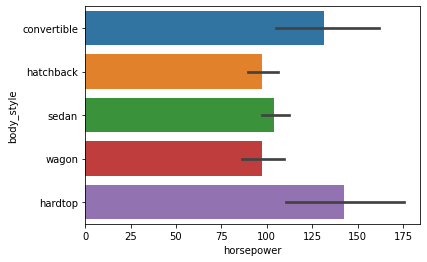

In [ ]:
sns.barplot(df['horsepower'],df['body_style'])

## Checking the correlation among the variables 

In [ ]:
df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.474993,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.146355,0.018373,-0.182196,0.075287,0.279849,-0.035527,0.036233,-0.082391
normalized_losses,0.474993,1.000000,0.007815,0.103659,0.153752,-0.335476,0.178547,0.174788,0.007498,0.062666,-0.120846,0.276665,0.211812,-0.301206,-0.264594,0.208886
wheel_base,-0.535987,0.007815,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.362642,-0.470606,-0.543304,0.584642
length,-0.365404,0.103659,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.281932,-0.665192,-0.698142,0.690628
width,-0.242423,0.153752,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.242569,-0.633531,-0.680635,0.751265
height,-0.550160,-0.335476,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.311922,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.178547,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.279027,-0.749543,-0.794889,0.834415
engine_size,-0.110581,0.174788,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.254961,-0.650546,-0.679571,0.872335
bore,-0.146355,0.007498,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.269486,-0.576954,-0.586917,0.543052
stroke,0.018373,0.062666,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.019004,-0.053955,-0.051793,0.081434


## Visualizing Correlation using Seaborn Heatmap for better understanding

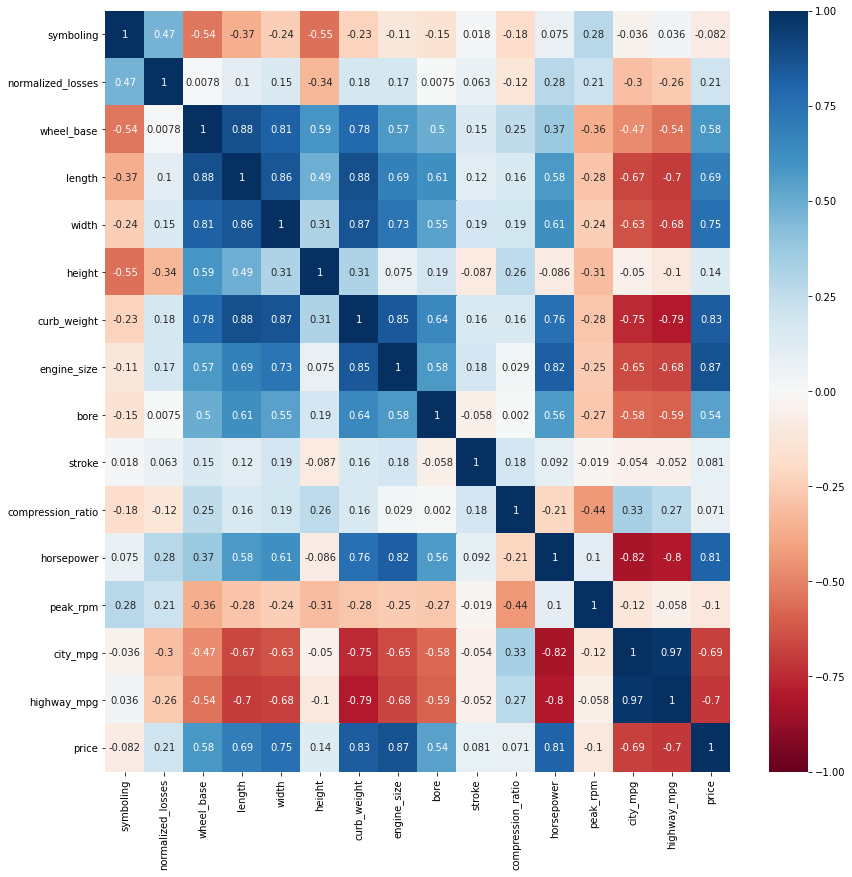

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap="RdBu", vmin=-1,vmax=1, annot=True)

## Converting Body_Style column into categorical column with valuess(premium or non - premium ) based on our porblem statement

In [ ]:
df["body_style"]= df["body_style"].str.replace("convertible", "Premium", case = False) 

In [ ]:
df["body_style"]= df["body_style"].str.replace("hardtop", "Premium", case = False) 

In [ ]:
df["body_style"]= df["body_style"].str.replace("sedan", "Non-Premium", case = False) 

In [ ]:
df["body_style"]= df["body_style"].str.replace("wagon", "Non-Premium", case = False) 

In [ ]:
df["body_style"]= df["body_style"].str.replace("hatchback", "Non-Premium", case = False) 

In [ ]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,Premium,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,Premium,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,Non-Premium,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,Non-Premium,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,Non-Premium,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,Non-Premium,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,Non-Premium,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,Non-Premium,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,Non-Premium,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## **Separating** the data into target variable and Explanatory variable

In [ ]:
x=df.drop(['body_style'],axis=1)
y=df['body_style']

## Creating dummy variable for categorical features 

In [ ]:
xdummy=pd.get_dummies(x,drop_first=True)

## Standardisation of data 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(xdummy)

array([[ 1.72504964,  1.27834516, -1.6851071 , ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [ 1.72504964,  1.27834516, -1.6851071 , ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [ 0.1271926 ,  1.27834516, -0.71010295, ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       ...,
       [-1.47066444, -0.90145246,  1.70261919, ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [-1.47066444, -0.90145246,  1.70261919, ..., -0.9187147 ,
        -0.21650635, -0.07071068],
       [-1.47066444, -0.90145246,  1.70261919, ...,  1.0884772 ,
        -0.21650635, -0.07071068]])

## Splitting the dataset into test and train in order to check the validity of our model

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(xdummy,y,test_size=0.25,random_state=360)

## Using Logistic Regression

In [ ]:
logmod=LogisticRegression()

## Fitting the model to our pre-processed dataset

In [ ]:
model1=logmod.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Importing evaluation metrics to check the accuracy of our model

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix

##We try to predict the test data now

In [ ]:
pred=model1.predict(X_test)

##We check the accuracy score now

In [ ]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

 Non-Premium       0.90      1.00      0.95        45
     Premium       1.00      0.17      0.29         6

    accuracy                           0.90        51
   macro avg       0.95      0.58      0.62        51
weighted avg       0.91      0.90      0.87        51

[[45  0]
 [ 5  1]]
0.9019607843137255


##We run the XgBoost algorithm for feature extraction

In [ ]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

model5 = XGBClassifier()
model5.fit(X_train, y_train)
# make predictions for test data
y_pred = model5.predict(X_test)
#predictions5 = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.16%


In [ ]:
from xgboost import plot_importance

In [ ]:
print(model5.feature_importances_)

[0.04619159 0.03136687 0.12309086 0.12108064 0.0410271  0.02692157
 0.02492628 0.03469235 0.15465912 0.01425381 0.01629543 0.
 0.05323965 0.01169034 0.         0.04062726 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05183266 0.         0.         0.02264633 0.
 0.         0.         0.         0.         0.         0.06676648
 0.         0.         0.         0.         0.         0.
 0.06896502 0.         0.         0.         0.         0.
 0.         0.         0.         0.04129039 0.         0.
 0.         0.         0.00843626 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


## Feature importance plot showing which explanatory varaible important for explaining the type of car (premium or non- premium)

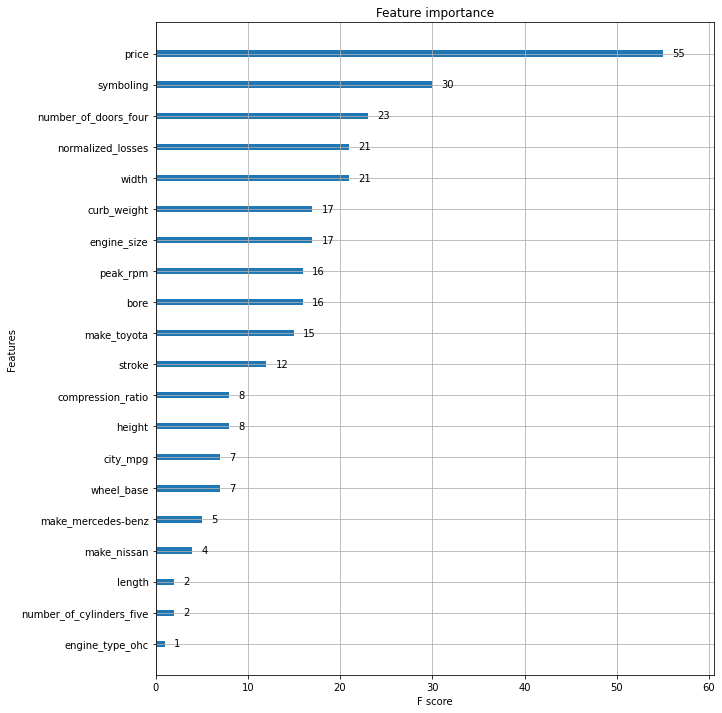

In [ ]:
az = plot_importance(model5)
az.figure.set_size_inches(10,12)

## Creating another model based on feature importance plot 

In [ ]:
x1=xdummy[['price','normalized_losses','width','curb_weight','peak_rpm','bore','make_toyota']]
y1=df['body_style']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x1)

array([[ 0.03631396,  1.27834516, -0.85346024, ..., -0.2537319 ,
         0.52448449, -0.43514263],
       [ 0.41538505,  1.27834516, -0.85346024, ..., -0.2537319 ,
         0.52448449, -0.43514263],
       [ 0.41538505,  1.27834516, -0.18559675, ..., -0.2537319 ,
        -2.42880955, -0.43514263],
       ...,
       [ 1.04422678, -0.90145246,  1.43635744, ...,  0.79135236,
         0.93570265, -0.43514263],
       [ 1.16848137, -0.90145246,  1.43635744, ..., -0.67176561,
        -1.19515508, -0.43514263],
       [ 1.18803412, -0.90145246,  1.43635744, ...,  0.58233551,
         1.68337202, -0.43514263]])

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=360)

In [ ]:
mod6=model5.fit(X_train1, y_train1)
# make predictions for test data
y_pred1 = model5.predict(X_test1)
#predictions5 = [round(value) for value in y_pred]
# evaluate predictions
accuracy1 = accuracy_score(y_test1,y_pred1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 92.16%


## Checking the multicollinearity among the variables 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(xdummy.values, i) for i in range(xdummy.shape[1])]
vif["features"] = xdummy.columns


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif['features'].values

array(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'number_of_doors_two', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_location_rear', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'number_of_cylinders_five',
       'number_of_cylinders_four', 'number_of_cylinders_six',
       'number_of_cylinders_three', 'number_of_cylinders_twelve'

In [ ]:
vif['VIF Factor'].values

array([7.05132756e+00, 5.06097537e+00, 1.96698356e+01, 2.34426177e+01,
       1.54241662e+01, 7.90711951e+00, 4.65457190e+01, 7.84815609e+01,
       1.60509015e+01, 6.53702912e+00, 2.49472751e+02, 5.50382703e+01,
       7.01261660e+00, 4.74811971e+01, 3.98269290e+01, 2.86566776e+01,
       1.10679765e+01, 1.36517341e+01, 5.09608912e+00, 1.00272537e+01,
       1.79001633e+01, 3.85265932e+00, 6.98361086e+00, 1.41461125e+01,
       1.51279230e+01, 2.79753254e+00, 1.44432250e+01, 1.52420398e+01,
                  inf, 7.78358512e+00, 1.01983086e+01, 3.48469274e+00,
       7.82182627e+00,            inf, 2.10089100e+01, 1.23180354e+01,
       1.56237398e+01, 1.51531574e+04, 6.62137878e+00, 3.25089353e+00,
       1.30828195e+01, 2.35343521e+01,            inf,            inf,
       1.93632663e+01,            inf, 6.06042753e+00,            inf,
       2.52936456e+01, 1.37208854e+02, 4.96466296e+01,            inf,
       8.41722295e+00,            inf, 3.11685628e+01, 6.23474982e+00,
      

## Using Linear Regression to understand which variable important in explaining the price of the car

In [ ]:
from sklearn.linear_model import LinearRegression as lr

In [ ]:
x5=df.drop(['price'],axis=1)
y5=df['price']

In [ ]:
x6=pd.get_dummies(x5,drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x6)

array([[ 1.72504964,  1.27834516, -1.6851071 , ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [ 1.72504964,  1.27834516, -1.6851071 , ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [ 0.1271926 ,  1.27834516, -0.71010295, ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       ...,
       [-1.47066444, -0.90145246,  1.70261919, ...,  1.0884772 ,
        -0.21650635, -0.07071068],
       [-1.47066444, -0.90145246,  1.70261919, ..., -0.9187147 ,
        -0.21650635, -0.07071068],
       [-1.47066444, -0.90145246,  1.70261919, ...,  1.0884772 ,
        -0.21650635, -0.07071068]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x6,y5,test_size=0.25,random_state=360)

In [ ]:
import statsmodels.api as sm
x7=sm.add_constant(x6)
model2=sm.OLS(y5,x7).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     71.32
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           8.54e-82
Time:                        13:16:17   Log-Likelihood:                -1749.9
No. Observations:                 201   AIC:                             3616.
Df Residuals:                     143   BIC:                             3807.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -5350.9287    1.1e+04     -0.489      0.626    -2.7e+04    1.63e+04
symboling                   -429.6186    258.721     -1.661      0.099    -941.031      81.793
normalized_losses            -10.8691      8.159     -1.332      0.185     -26.996       5.258
wheel_base                   220.4968     89.631      2.460      0.015      43.324     397.670
length                      -137.3471     46.755     -2.938      0.004    -229.767     -44.927
width                        594.9028    223.538      2.661      0.009     153.036    1036.769
height                      -417.9248    136.898     -3.053      0.003    -688.531    -147.319
curb_weight                    6.9526      1.509      4.607      0.000       3.970       9.936
engine_size                   89.5826     25.033      3.579      0.000      40.100     139.065
bore                       -3102.3937   1827.199     -1.698      0.092   -6714.205     509.417
stroke                     -1453.8973    978.837     -1.485      0.140   -3388.756     480.962
compression_ratio          -1008.2107    483.444     -2.085      0.039   -1963.830     -52.591
horsepower                    -4.0147     24.317     -0.165      0.869     -52.081      44.052
peak_rpm                       2.4389      0.647      3.772      0.000       1.161       3.717
city_mpg                      -8.3761    131.593     -0.064      0.949    -268.495     251.743
highway_mpg                  118.0065    113.110      1.043      0.299    -105.577     341.590
make_audi                   2201.0787   2424.964      0.908      0.366   -2592.329    6994.487
make_bmw                    5422.6725   2328.969      2.328      0.021     819.017       1e+04
make_chevrolet             -5996.6141   2226.747     -2.693      0.008   -1.04e+04   -1595.021
make_dodge                 -6330.2420   1808.700     -3.500      0.001   -9905.485   -2754.999
make_honda                 -3145.6198   2113.066     -1.489      0.139   -7322.501    1031.261
make_isuzu                 -5251.7544   2395.802     -2.192      0.030   -9987.517    -515.992
make_jaguar                -2641.5031   2666.057     -0.991      0.323   -7911.478    2628.471
make_mazda                 -3014.0752   1663.022     -1.812      0.072   -6301.357     273.207
make_mercedes-benz           923.9192   2442.948      0.378      0.706   -3905.036    5752.875
make_mercury               -4515.4545   2921.781     -1.545      0.124   -1.03e+04    1260.007
make_mitsubishi            -6341.5171   1830.214     -3.465      0.001   -9959.286   -2723.748
make_nissan                -3216.0571   1667.789     -1.928      0.056   -6512.763      80.649
make_peugot                -4585.4524   1808.567     -2.535      0.012   -8160.433   -1010.472
make_plymouth              -6291.7907   179



---
K- MEANS CLUSTERING 




K - Means Clustering for Horsepower vs Price

In [ ]:
## Extracting the columns

Z=df.iloc[:,[21,25]].values  # Horsepower vs Price

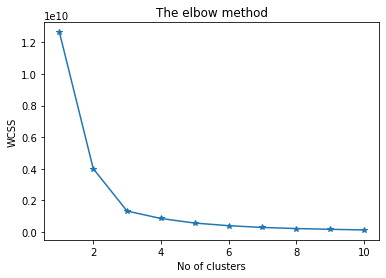

In [ ]:
## Finding the optimal number of clusters

from sklearn.cluster import KMeans
# Determinng number of cluster to be formed 
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,random_state=0)
    Kmeans.fit(Z)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss,'*-')
plt.title("The elbow method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

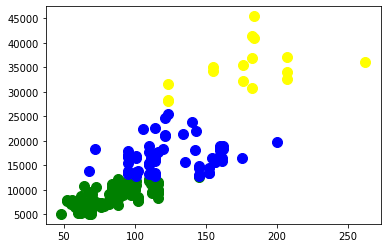

In [ ]:
# Running th K-means algorithm

Kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,
    max_iter=300,random_state=0)
y_kmeans=Kmeans.fit_predict(Z)

plt.scatter(Z[y_kmeans==0,0],Z[y_kmeans==0,1],s=100,c='green',label='cluster 1')
plt.scatter(Z[y_kmeans==1,0],Z[y_kmeans==1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(Z[y_kmeans==2,0],Z[y_kmeans==2,1],s=100,c='blue',label='cluster 3')

# Clearly, as the price increases, the horsepower also rise. K-means gives us 3 clusters according to varying prices and horsepower.

K - Means Clustering for Highway Mileage vs Price

In [ ]:
Z2=df.iloc[:,[24,25]].values # Highwaympg size vs Price

NameError: ignored

In [ ]:
from sklearn.cluster import KMeans
# determinng number of cluster to be formed 
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,random_state=0)
    Kmeans.fit(Z2)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss,'*-')
plt.title("The elbow method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,
    max_iter=300,random_state=0)
y_kmeans=Kmeans.fit_predict(Z2)

plt.scatter(Z2[y_kmeans==0,0],Z2[y_kmeans==0,1],s=100,c='green',label='cluster 1')
plt.scatter(Z2[y_kmeans==1,0],Z2[y_kmeans==1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(Z2[y_kmeans==2,0],Z2[y_kmeans==2,1],s=100,c='blue',label='cluster 3')

# Clearly, as the price increases, the highway mileage  falls. K-means gives us 3 clusters according to varying prices and highway mileage.

K - Means Clustering for City Mileage vs Price

In [ ]:
Z3=df.iloc[:,[23,25]].values # Citympg size vs Price

In [ ]:
from sklearn.cluster import KMeans
# determinng number of cluster to be formed 
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,random_state=0)
    Kmeans.fit(Z3)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss,'*-')
plt.title("The elbow method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,
    max_iter=300,random_state=0)
y_kmeans=Kmeans.fit_predict(Z3)

plt.scatter(Z3[y_kmeans==0,0],Z3[y_kmeans==0,1],s=100,c='green',label='cluster 1')
plt.scatter(Z3[y_kmeans==1,0],Z3[y_kmeans==1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(Z3[y_kmeans==2,0],Z3[y_kmeans==2,1],s=100,c='blue',label='cluster 3')

# Clearly, as the price increases, the city mileage falls. K-means gives us 3 clusters according to varying prices and city mileage.

K - Means Clustering for Engine Size vs Price

In [ ]:
Z4=df.iloc[:,[16,25]].values # Engine_size vs Price

In [ ]:
from sklearn.cluster import KMeans
# determinng number of cluster to be formed 
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,random_state=0)
    Kmeans.fit(Z4)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss,'*-')
plt.title("The elbow method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,
    max_iter=300,random_state=0)
y_kmeans=Kmeans.fit_predict(Z4)

plt.scatter(Z4[y_kmeans==0,0],Z4[y_kmeans==0,1],s=100,c='green',label='cluster 1')
plt.scatter(Z4[y_kmeans==1,0],Z4[y_kmeans==1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(Z4[y_kmeans==2,0],Z4[y_kmeans==2,1],s=100,c='blue',label='cluster 3')

# Clearly, as the engine size increases, Price also increases showing a direct positive correlation. 3 Clusters are formed as per the varying prices.